In [12]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

from ABCD_dnn_3d import sample3d, testABCDrate

### Load samples

In [250]:
cr_raw = np.load('data/xyz_newcov_3d_40to100_5e6_0.npy') #load histogram
#bknd = np.load('data/xyz_3d_40to100_5e5_1e3_bknd.npy')
#sig = np.load('data/xyz_3d_40to100_5e5_1e3_sig.npy')

### Select signal region

In [251]:
signal = (cr_raw[:,0]>0.3)&(cr_raw[:,1]>0.3)&(cr_raw[:,2]>0.3)
crlist = cr_raw[np.invert(signal)]

In [252]:
binsize = 6
cr_raw = cr_raw.T[3].reshape((binsize, binsize, 6))
# bknd = bknd.T[3].reshape((binsize, binsize, 6))
# sig = sig.T[3].reshape((binsize, binsize, 6))

### Train ABCDnn

In [253]:
def trainEnsemble(crlist, shape, nrepeat, ctrl_bins, verbose=1):
    grid = np.zeros(shape)
    grid_std = np.zeros(shape)
    count = np.zeros(nrepeat)

    for i in range(nrepeat):
        model = testABCDrate(crlist)
        grid_i, grid_std_i = sample3d(model, shape)
        grid += grid_i
        grid_std += grid_std_i**2
        count[i] = grid_i[ctrl_bins[0]:,ctrl_bins[1]:, ctrl_bins[2]:].sum()
        
        if verbose==1: print(f'{i}-th training complete')
    
    return count, grid/nrepeat, np.sqrt(grid_std)/nrepeat

In [254]:
nrepeat = 100

with tf.device('CPU:0'):
    count, grid, grid_std = trainEnsemble(crlist, [6,6,6], nrepeat, [2,2,2])

/home/yhs07128/.conda/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:2281: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


0-th training complete
1-th training complete
2-th training complete
3-th training complete
4-th training complete
5-th training complete
6-th training complete
7-th training complete
8-th training complete
9-th training complete
10-th training complete
11-th training complete
12-th training complete
13-th training complete
14-th training complete
15-th training complete
16-th training complete
17-th training complete
18-th training complete
19-th training complete
20-th training complete
21-th training complete
22-th training complete
23-th training complete
24-th training complete
25-th training complete
26-th training complete
27-th training complete
28-th training complete
29-th training complete
30-th training complete
31-th training complete
32-th training complete
33-th training complete
34-th training complete
35-th training complete
36-th training complete
37-th training complete
38-th training complete
39-th training complete
40-th training complete
41-th training complete
42

### Results

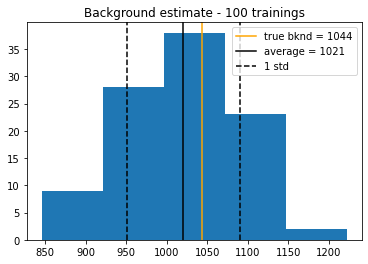

In [262]:
bknd_true = cr_raw[2:, 2:, 2:].sum()
total_true = cr_raw[2:, 2:, 2:].sum()
avg = count.mean()
std = np.std(count)
plt.hist(count, bins=5)
plt.axvline(bknd_true, color='orange', label=f'true bknd = {bknd_true:.0f}')
# plt.axvline(total_true, color='purple', label=f'true total = {total_true:.0f}')
plt.axvline(avg, color='black', label=f'average = {avg:.0f}')
plt.axvline(avg+std, color='black', ls='--', label=f'1 std')
plt.axvline(avg-std, color='black', ls='--')
plt.legend()
plt.title(f'Background estimate - {nrepeat} trainings')
#plt.savefig('figures/bknd_count_nn_newcov.png', dpi=200)

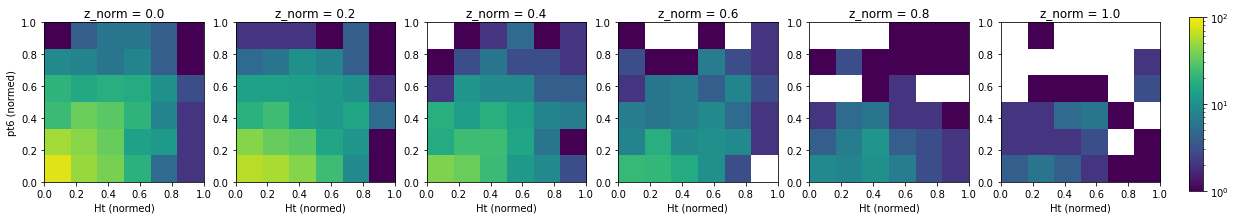

In [153]:
fig,ax = plt.subplots(1, 6, figsize=(20, 3.5))
for i in range(6):
    im = ax[i].imshow(bknd[i], origin='lower', norm=colors.LogNorm(vmax = 1e2), extent = [0,1,0,1])
    ax[i].set_xlabel('x (normed)')
    ax[i].set_title(f'z_norm = {i/5}')

ax[0].set_ylabel('y (normed)')
cb_ax = fig.add_axes([0.92, 0.15, 0.01, 0.69])
cbar = fig.colorbar(im, cax=cb_ax)
#plt.savefig('figures/bknd_true.png', dpi=200)

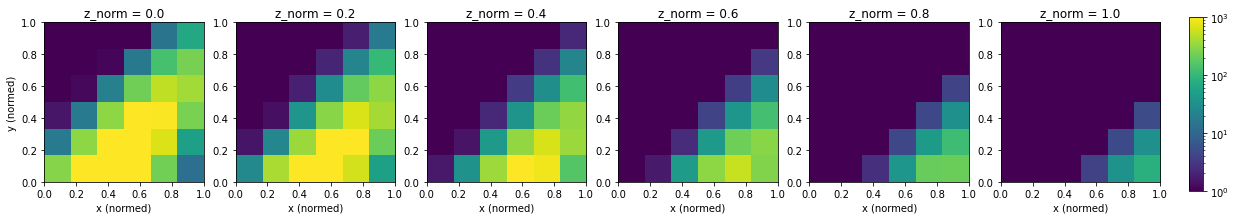

In [259]:
fig,ax = plt.subplots(1, 6, figsize=(20, 3.5))
for i in range(6):
    im = ax[i].imshow(grid[i], norm=colors.LogNorm(vmax = 1e3, vmin=1), origin='lower', extent = [0,1,0,1])
    ax[i].set_xlabel('x (normed)')
    ax[i].set_title(f'z_norm = {i/5}')

ax[0].set_ylabel('y (normed)')
cb_ax = fig.add_axes([0.92, 0.15, 0.01, 0.69])
cbar = fig.colorbar(im, cax=cb_ax)
#plt.savefig('figures/bknd_nn_newcov.png', dpi=200)

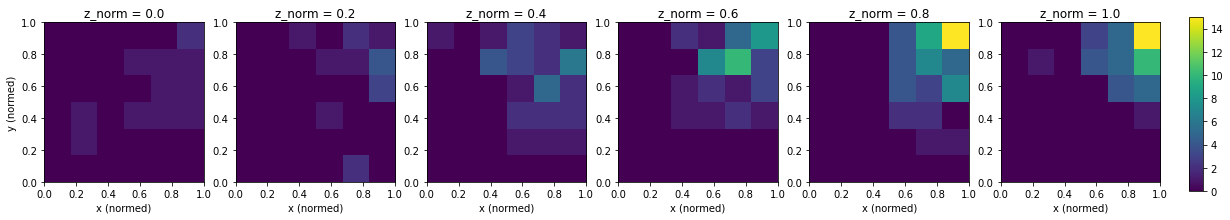

In [163]:
fig,ax = plt.subplots(1, 6, figsize=(20, 3.5))
for i in range(6):
    im = ax[i].imshow(sig[i], origin='lower', extent = [0,1,0,1], vmin = 0, vmax = 15)
    ax[i].set_xlabel('x (normed)')
    ax[i].set_title(f'z_norm = {i/5}')

ax[0].set_ylabel('y (normed)')
cb_ax = fig.add_axes([0.92, 0.15, 0.01, 0.69])
cbar = fig.colorbar(im, cax=cb_ax)
#plt.savefig('figures/sig_true.png', dpi=200)

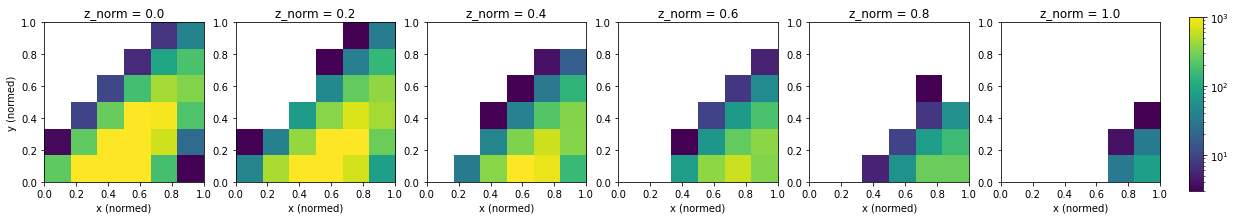

In [261]:
fig,ax = plt.subplots(1, 6, figsize=(20, 3.5))
for i in range(6):
    im = ax[i].imshow(cr_raw[i], origin='lower', norm=colors.LogNorm(vmax = 1e3), extent = [0,1,0,1])
    ax[i].set_xlabel('x (normed)')
    ax[i].set_title(f'z_norm = {i/5}')

ax[0].set_ylabel('y (normed)')
cb_ax = fig.add_axes([0.92, 0.15, 0.01, 0.69])
cbar = fig.colorbar(im, cax=cb_ax)
#plt.savefig('figures/total_true_newcov.png', dpi=200)

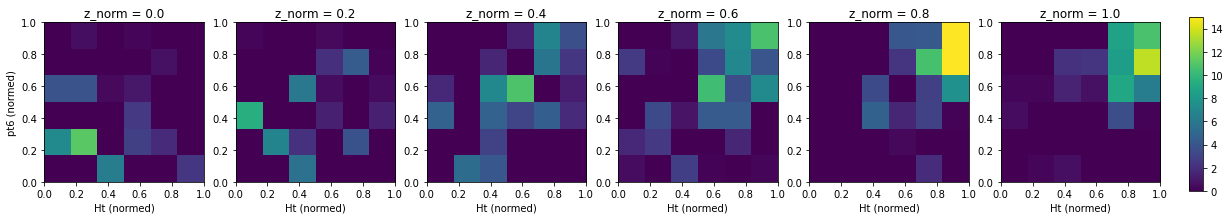

In [161]:
fig,ax = plt.subplots(1, 6, figsize=(20, 3.5))
for i in range(6):
    im = ax[i].imshow(cr_raw[i]-grid[i], origin='lower', extent = [0,1,0,1], vmin=0, vmax=15)
    ax[i].set_xlabel('x (normed)')
    ax[i].set_title(f'z_norm = {i/5}')

ax[0].set_ylabel('y (normed)')
cb_ax = fig.add_axes([0.92, 0.15, 0.01, 0.69])
cbar = fig.colorbar(im, cax=cb_ax)
#plt.savefig('figures/sig_nn.png', dpi=200)